# Non-Linear Least Square

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [1]:
# 定义模型函数
def model_func(t, k1, k2, k3):
    # 根据已知的模型定义函数
    x1 = f1(t, k1, k2, k3)
    x2 = f2(t, k1, k2, k3)
    return x1, x2

# 定义拟合误差函数
def error_func(params, t, x1, x2):
    k1, k2, k3 = params
    x1_pred, x2_pred = model_func(t, k1, k2, k3)
    error1 = x1 - x1_pred
    error2 = x2 - x2_pred
    return np.concatenate((error1, error2))

# 输入离散的时间点和对应的数据点
t = np.array([t1, t2, t3, ...])
x1 = np.array([x1_1, x1_2, x1_3, ...])
x2 = np.array([x2_1, x2_2, x2_3, ...])

# 定义初始参数值
initial_params = np.array([initial_k1, initial_k2, initial_k3])

# 进行最小二乘拟合
result = least_squares(error_func, initial_params, args=(t, x1, x2))

# 获取拟合结果
fitted_params = result.x

NameError: name 't1' is not defined

In [15]:
def x1(t,k1,k2,k3):
    return np.cos(k1*t) + np.cos(k2*t) + np.cos(k2*t)
def x1(t,k1,k2,k3):
    return np.sin(k1*t) + np.sin(k2*t) + np.sin(k2*t)

In [13]:
np.array([[1,2]])

array([[1, 2]])

In [31]:
import numpy as np
from scipy.optimize import least_squares

# 定义模型函数
def x1(t, k1, k2, k3):
    return np.cos(k1*t) + np.cos(k2*t) + np.cos(k3*t)

def x2(t, k1, k2, k3):
    return np.sin(k1*t) + np.sin(k2*t) + np.sin(k3*t)

# 定义拟合误差函数
def error_func(params, t, data_x1, data_x2):
    k1, k2, k3 = params
    x1_pred = x1(t, k1, k2, k3)
    x2_pred = x2(t, k1, k2, k3)
    error1 = data_x1 - x1_pred
    error2 = data_x2 - x2_pred
    return np.concatenate((error1, error2))

# 输入离散的时间点和对应的数据点
t = np.arange(0,10,0.01)
data_x1 = x1(t,1.0,2.0,3.0)
data_x2 = x2(t,1.0,2.0,3.0)

# 定义初始参数值
initial_params = np.array([1.1, 2.1, 3.1])

# 进行最小二乘拟合
result = least_squares(error_func, initial_params, args=(t, data_x1, data_x2))

# 获取拟合结果
fitted_params = result.x

print(fitted_params)

[1. 2. 3.]


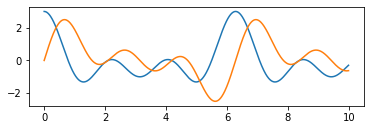

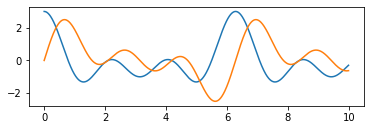

In [32]:

plt.subplot(2,1,1)
plt.plot(t,data_x1)
plt.plot(t,data_x2)
plt.show()

(k1,k2,k3) = fitted_params
plt.subplot(2,1,2)
plt.plot(t,x1(t,k1,k2,k3))
plt.plot(t,x2(t,k1,k2,k3))
plt.show()

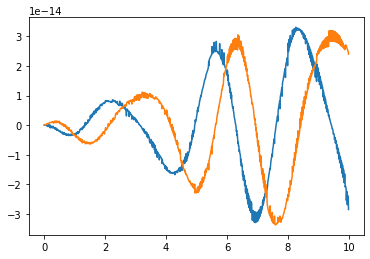

In [34]:
(k1,k2,k3) = fitted_params
plt.plot(t,data_x1 - x1(t,k1,k2,k3))
plt.plot(t,data_x2 - x2(t,k1,k2,k3))
plt.show()

In [ ]:
def x1(t,k1,k2,k3):
    return np.cos(k1*t) + np.cos(k2*t) + np.cos(k2*t)
def x1(t,k1,k2,k3):
    return np.sin(k1*t) + np.sin(k2*t) + np.sin(k2*t)



# Non-Linear Least Square for Coupled-Oscillator

In [63]:
from numpy import array,sqrt,cos,sin,abs
from numpy.linalg import inv

In [84]:
def x1(t,k1,k2,k3):
    return np.cos(k1*t) + np.cos(k2*t) + np.cos(k2*t)
def x1(t,k1,k2,k3):
    return np.sin(k1*t) + np.sin(k2*t) + np.sin(k2*t)

def Coupled_Oscillator(t,k1,k2,k3, x1_i=0.0,x2_i=0.0, m1=1.0, m2=1.0):
    trF  = -(m2*k1 + (m1+m2)*k2 + m1*k3)/(m1*m2) # Trace of Matrix
    detF =  (k1*k2 + k2*k3 + k3*k1)/(m1*m2)      # Determinant of Matrix
    lda1 =  (trF + sqrt(trF*trF-4*detF))/2       # 1st Eigen vlaue
    lda2 =  (trF - sqrt(trF*trF-4*detF))/2       # 2nd Eigen vlaue
    omega1 = sqrt(-lda1)                         # 1st Eigen frequence
    omega2 = sqrt(-lda2)                         # 2nd Eigen frequence)
    mu1 = array([[m2*lda1+(k2+k3)], [k2]])       # 1st Eigen vector
    mu2 = array([[m2*lda2+(k2+k3)], [k2]])       # 2nd Eigen vector
    M = np.hstack([mu1,mu2])                     # Matrix of Eigen vectors
    invM = inv(M)                                # inverse of Matrix
    C = invM@array([[x1_i],[x2_i]])              # coefficeints Matrix
    C1 = C[0][0]                                 # 1st coefficeint
    C2 = C[1][0]                                 # 2nd coefficeint
    psi = C1*cos(omega1*t)*mu1 + C2*cos(omega2*t)*mu2 # General Solution
    return psi[0],psi[1]

In [85]:
x1_i =  1.0
x2_i = -1.0
m1   =  1.0
m2   =  1.0
def error_func(params, t, x1, x2):
    k1, k2, k3 = params
    x1_pred, x2_pred = Coupled_Oscillator(t, k1, k2, k3, x1_i=x1_i,x2_i=x2_i, m1=m1, m2=m2)
    error1 = x1 - x1_pred
    error2 = x2 - x2_pred
    return np.concatenate((error1, error2))

t = np.arange(0,10,0.01)
(x1,x2) = Coupled_Oscillator(t, 1.1, 1.9, 1.1, x1_i=x1_i,x2_i=x2_i, m1=m1, m2=m2)


initial_params = np.array([1.0, 1.0, 1.0])


result = least_squares(error_func, initial_params, args=(t, x1, x2))

# # 获取拟合结果
fitted_params = result.x
print(fitted_params)

<ipython-input-84-ca01fe456be7>:11: RuntimeWarning: invalid value encountered in sqrt
  omega1 = sqrt(-lda1)                         # 1st Eigen frequence


ValueError: array must not contain infs or NaNs

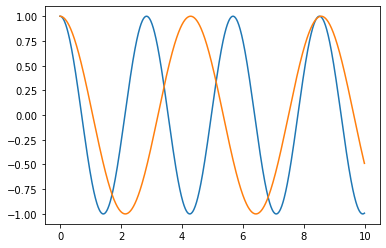

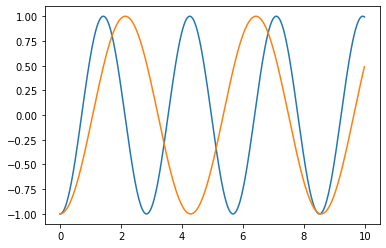

In [83]:

(k1,k2,k3) = fitted_params
(x1_,x2_) = Coupled_Oscillator(t,k1,k2,k3,x1_i=x1_i,x2_i=x2_i, m1=m1, m2=m2)
plt.plot(t,x1)
plt.plot(t,x1_)
plt.show()
plt.plot(t,x2)
plt.plot(t,x2_)
plt.show()